**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [80]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [82]:
print(train_images.shape[1:])

(28, 28)


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [83]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


#convert data to float and scale values between 0 and 1

In [0]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')
train_data1 = train_data.astype('float')
test_data1 = test_data.astype('float')

#scale data

In [0]:
train_data /=255.0
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [0]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network

In [12]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 9s 157us/step - loss: 1.1032 - acc: 0.6663 - val_loss: 0.6754 - val_acc: 0.7803
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.4566 - acc: 0.8645 - val_loss: 0.3986 - val_acc: 0.8790
Epoch 3/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.3473 - acc: 0.8985 - val_loss: 0.3217 - val_acc: 0.9095
Epoch 4/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2984 - acc: 0.9122 - val_loss: 0.2773 - val_acc: 0.9167
Epoch 5/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.2616 - acc: 0.9230 - val_loss: 0.2702 - val_acc: 0.9213
Epoch 6/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2300 - acc: 0.9326 - val_loss: 0.2486 - val_acc: 0.9264
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.2035 - acc: 0.9403 - val_loss: 0.2060 - v

**PLOTING A GRAPH FOR VALIDATION ACCURACY AND ACCURACY**


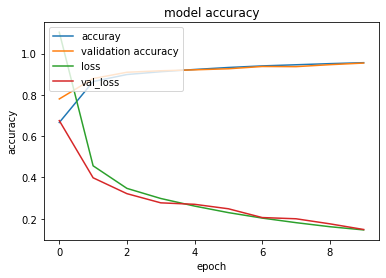

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

IMAGE PLOTING FROM TEST DATA

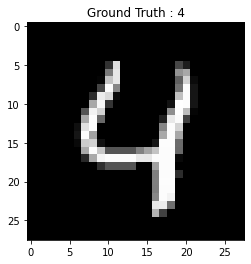

In [70]:
plt.imshow(test_images[4,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[4]))
plt.show()

PREDICTION ON THE IMAGE

In [69]:
x=model.predict_classes(test_data[[4],:])
print("Predicted label",test_labels[x])

Predicted label [4]


Changing the number of hidden layer and the activation to tanh or sigmoid 


In [50]:
m = Sequential()
m.add(Dense(512, activation='relu', input_shape=(dimData,)))
m.add(Dense(512, activation='relu'))
m.add(Dense(512, activation='tanh'))
m.add(Dense(512, activation='sigmoid'))
m.add(Dense(10, activation='softmax'))
m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
m.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 24us/step - loss: 1.1068 - acc: 0.5937 - val_loss: 0.9028 - val_acc: 0.6772
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.4518 - acc: 0.8581 - val_loss: 0.3270 - val_acc: 0.9028
Epoch 3/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.2609 - acc: 0.9194 - val_loss: 0.2680 - val_acc: 0.9154
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.1866 - acc: 0.9422 - val_loss: 0.1936 - val_acc: 0.9396
Epoch 5/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.1489 - acc: 0.9545 - val_loss: 0.1649 - val_acc: 0.9512
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.1231 - acc: 0.9619 - val_loss: 0.1272 - val_acc: 0.9613
Epoch 7/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.1064 - acc: 0.9673 - val_loss: 0.2484 - val_acc

Training the model without scaling

In [88]:
p = Sequential()
p.add(Dense(512, activation='relu', input_shape=(dimData,)))
p.add(Dense(512, activation='relu'))
p.add(Dense(10, activation='softmax'))
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p.fit(train_data1, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data1, test_labels_one_hot))  # Here iam using testdata1 and traindata1 this data are not scaled (/255)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 22us/step - loss: 10.2800 - acc: 0.3607 - val_loss: 9.5705 - val_acc: 0.4051
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 9.0855 - acc: 0.4354 - val_loss: 8.1162 - val_acc: 0.4956
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 8.0735 - acc: 0.4983 - val_loss: 7.6301 - val_acc: 0.5262
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 7.8302 - acc: 0.5137 - val_loss: 7.5892 - val_acc: 0.5288
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 7.7305 - acc: 0.5200 - val_loss: 7.6922 - val_acc: 0.5224
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 7.8019 - acc: 0.5155 - val_loss: 7.5348 - val_acc: 0.5323
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 7.5798 - acc: 0.5293 - val_loss: 7.3759 - val_ac

API MODEL  (BONUS POINT)


In [94]:
from keras.models import Model
from keras.layers import Input
i=Input(shape=(784,))
x= Dense(512, activation='relu')(i)
x= Dense(512, activation='relu')(x)

x= Dense(10, activation='softmax')(x)
p = Model(input=i,output=x)
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.2719 - acc: 0.9150 - val_loss: 0.1394 - val_acc: 0.9547
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0933 - acc: 0.9706 - val_loss: 0.1591 - val_acc: 0.9506
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0591 - acc: 0.9813 - val_loss: 0.0753 - val_acc: 0.9768
Epoch 4/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0395 - acc: 0.9875 - val_loss: 0.0971 - val_acc: 0.9718
Epoch 5/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0290 - acc: 0.9907 - val_loss: 0.0782 - val_acc: 0.9774
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0213 - acc: 0.9929 - val_loss: 0.0784 - val_acc: 0.9793
Epoch 7/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0169 - acc: 0.9947 - val_loss: 0.1041 - val_acc